In [1]:
#importing stuff
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

In [2]:
def cross_entropy(y,y_pre):
    loss=-np.sum(y*np.log(y_pre))
    return loss/float(y_pre.shape[0])

In [3]:
#with water
Grad_w = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\with water\\test5-gradually increase force\\third try 14122021\\I-V Characterizer-1 Run 59 2021-12-14T07.12.52.csv",index_col = "Index")
gradforce_w = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\with water\\test5-gradually increase force\\third try 14122021\\test5.log", delimiter = "\t")

#gradforce_w.columns = ["Reading", "Load", "time"]


In [4]:
fontsize = 40

<AxesSubplot:title={'center':'Test 5 with water Force test data'}, xlabel='Time', ylabel='Force (load)'>

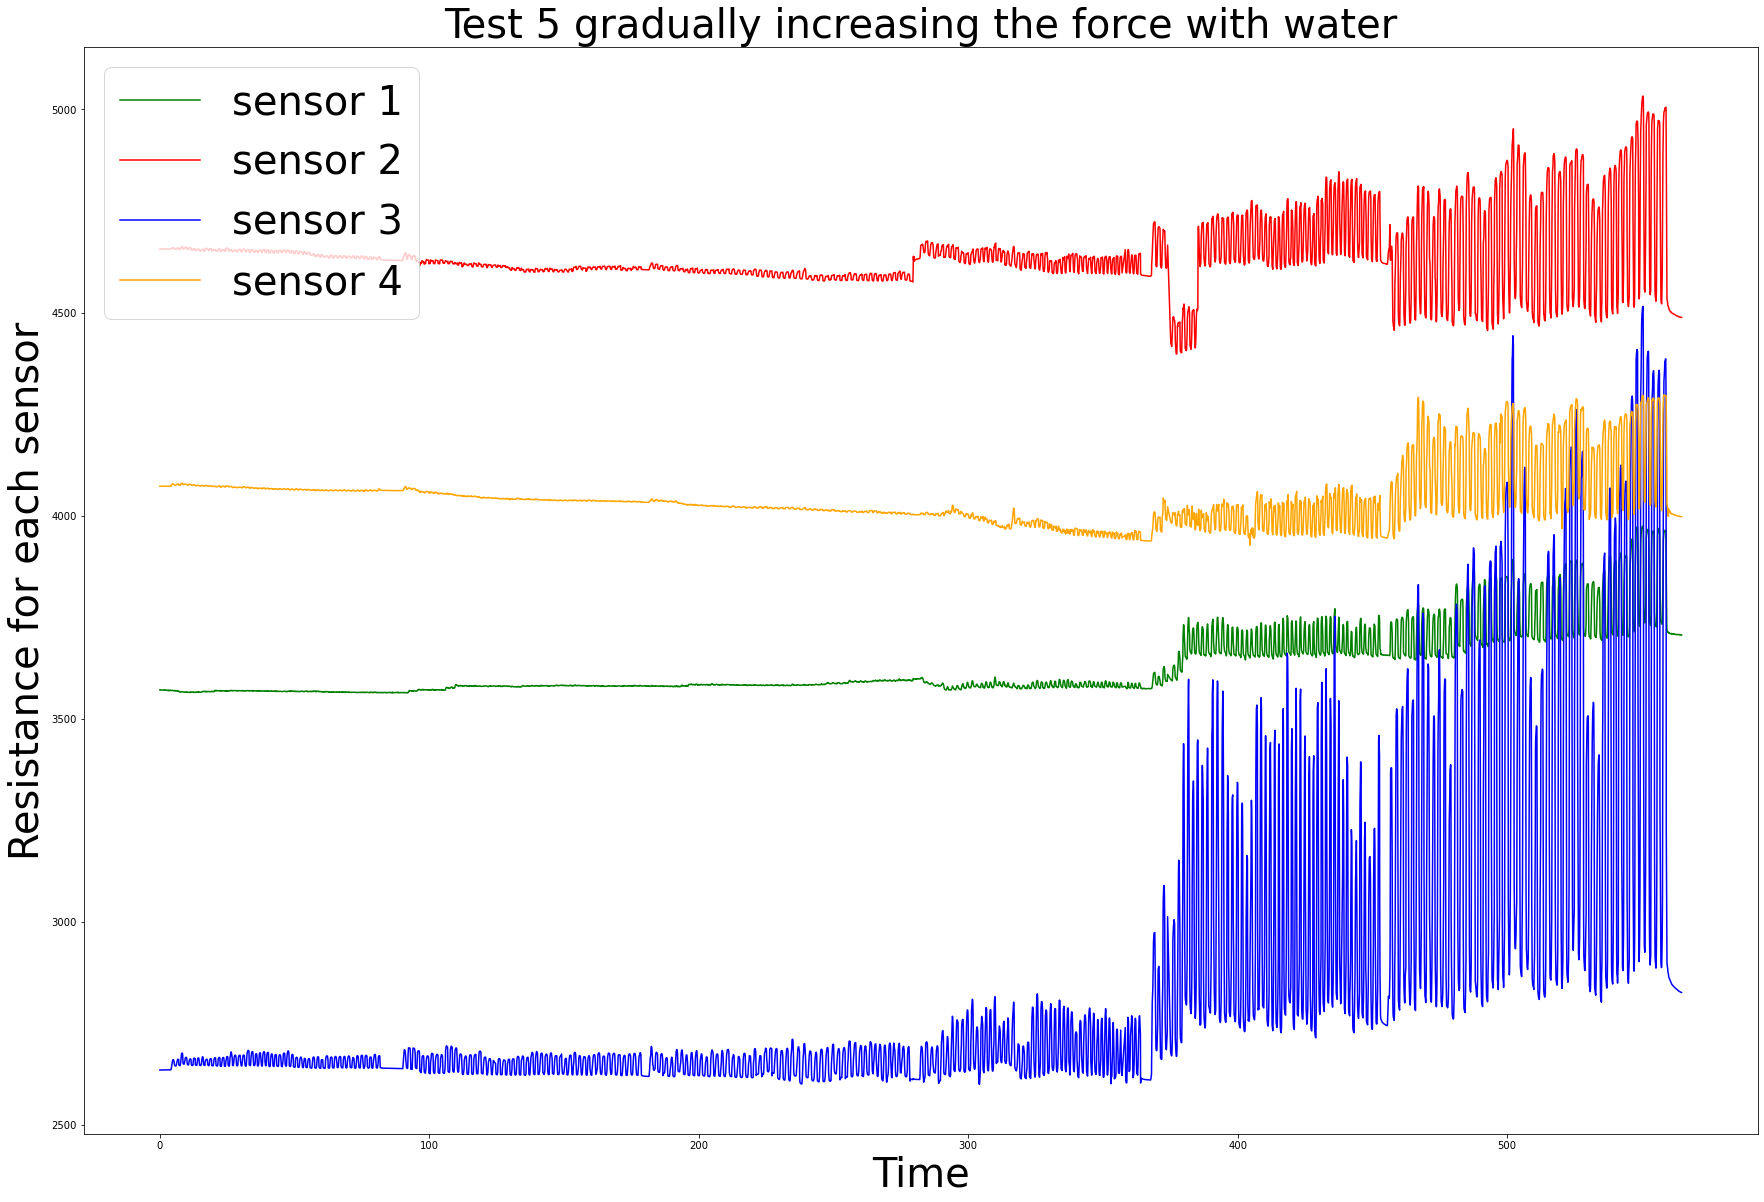

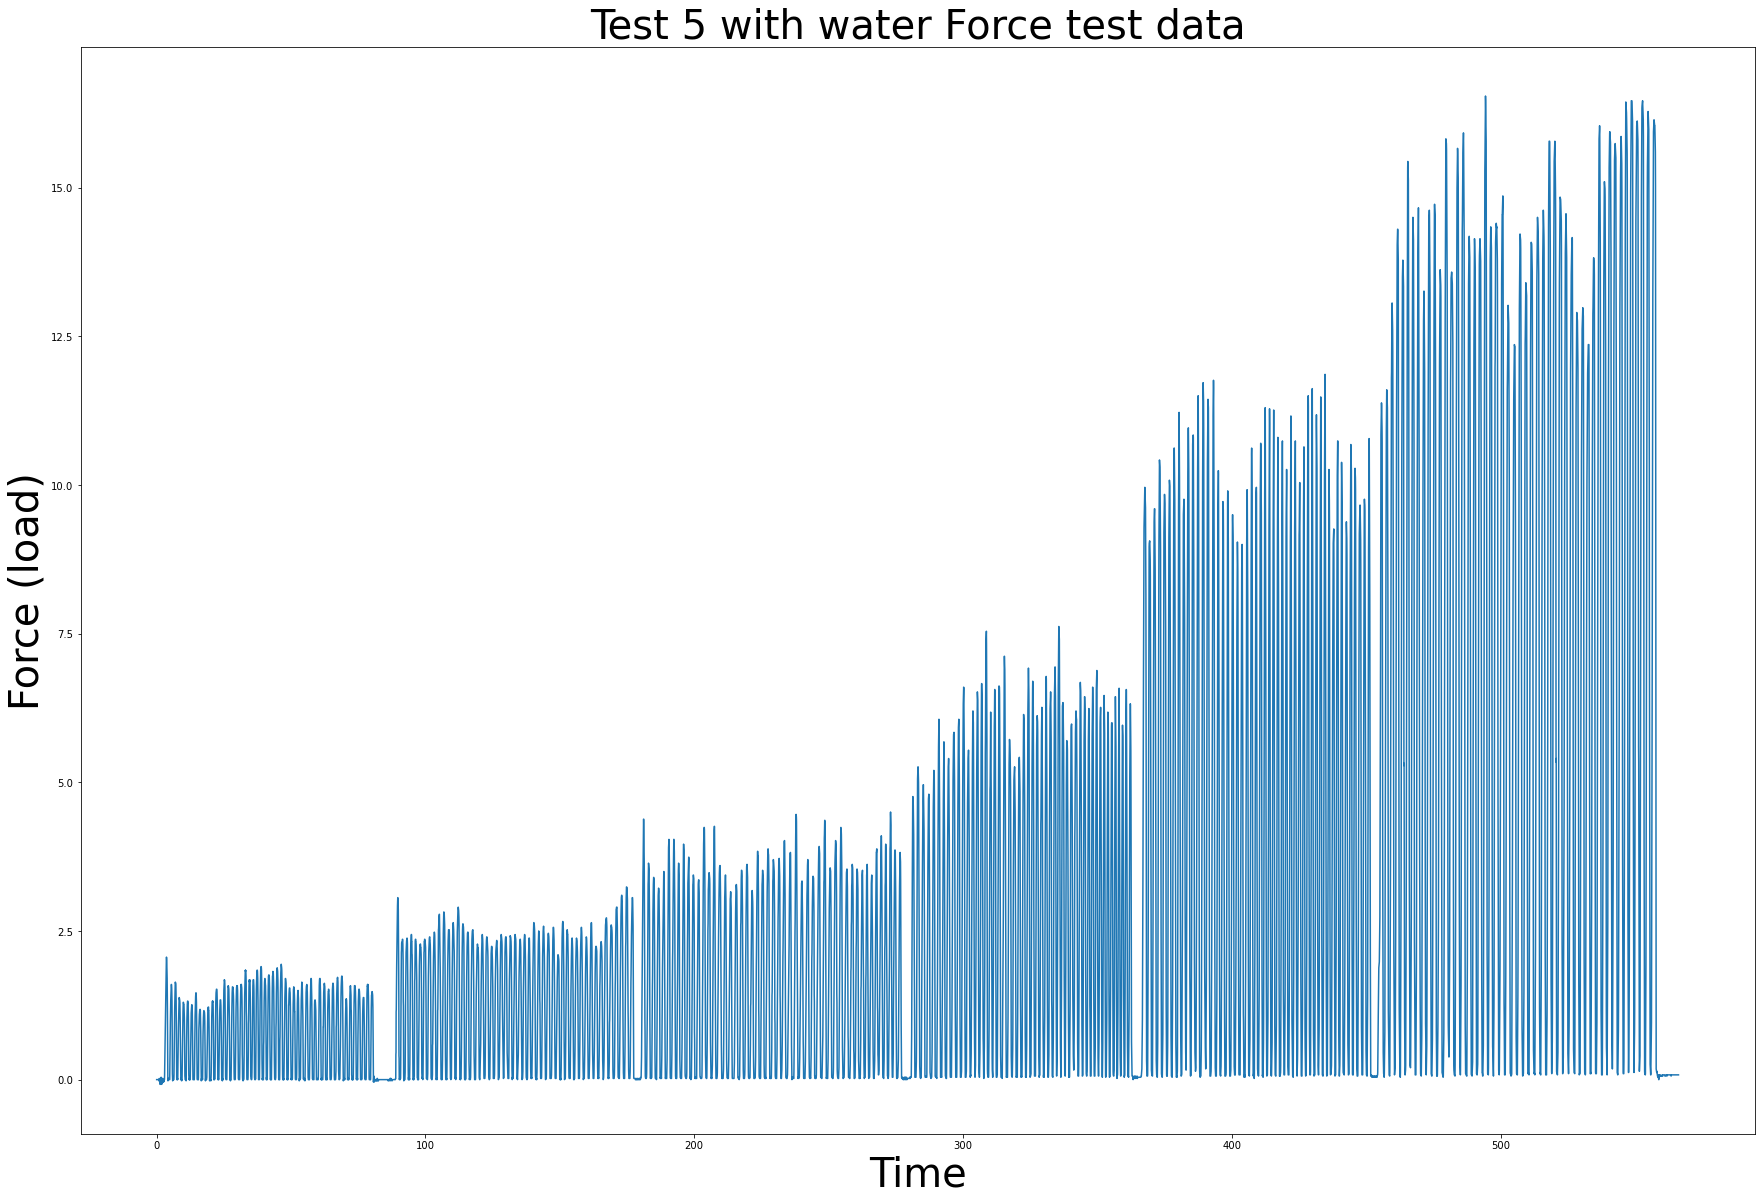

In [6]:
#plotting the data for test 5


time5_w= Grad_w["SMU-1 Time (s)"].values.reshape(-1,1)

t5w_r1 = Grad_w["SMU-1 Voltage (V)"]/Grad_w["SMU-1 Current (A)"]
t5w_r2 = Grad_w["SMU-2 Voltage (V)"]/Grad_w["SMU-2 Current (A)"]
t5w_r3 = Grad_w["SMU-3 Voltage (V)"]/Grad_w["SMU-3 Current (A)"]
t5w_r4 = Grad_w["SMU-4 Voltage (V)"]/Grad_w["SMU-4 Current (A)"]

fig, ex5_1 = plt.subplots(figsize=(30,20))
ex5_1.plot(time5_w,t5w_r1, color = 'green', label = 'sensor 1')
ex5_1.plot(time5_w,t5w_r2, color = 'red', label = 'sensor 2')
ex5_1.plot(time5_w,t5w_r3, color = 'blue', label = 'sensor 3')
ex5_1.plot(time5_w,t5w_r4, color = 'orange', label = 'sensor 4')
plt.title("Test 5 gradually increasing the force with water",fontsize = fontsize)
plt.xlabel("Time",fontsize = fontsize)
plt.ylabel("Resistance for each sensor",fontsize = fontsize)
ex5_1.legend(loc = 'upper left',fontsize = fontsize)


ex5_1

#gradforce_w
timeforce5_w = gradforce_w["Time"].values.reshape(-1,1)
force5_w = gradforce_w["Load"]

fig, ax5_f1 = plt.subplots(figsize=(30,20))
ax5_f1.plot(timeforce5_w,force5_w)

plt.title("Test 5 with water Force test data",fontsize = fontsize)
plt.xlabel("Time",fontsize = fontsize)
plt.ylabel("Force (load)",fontsize = fontsize)
ax5_f1

# Data for Sensor 3 - Test 5 

Text(0, 0.5, 'resistance')

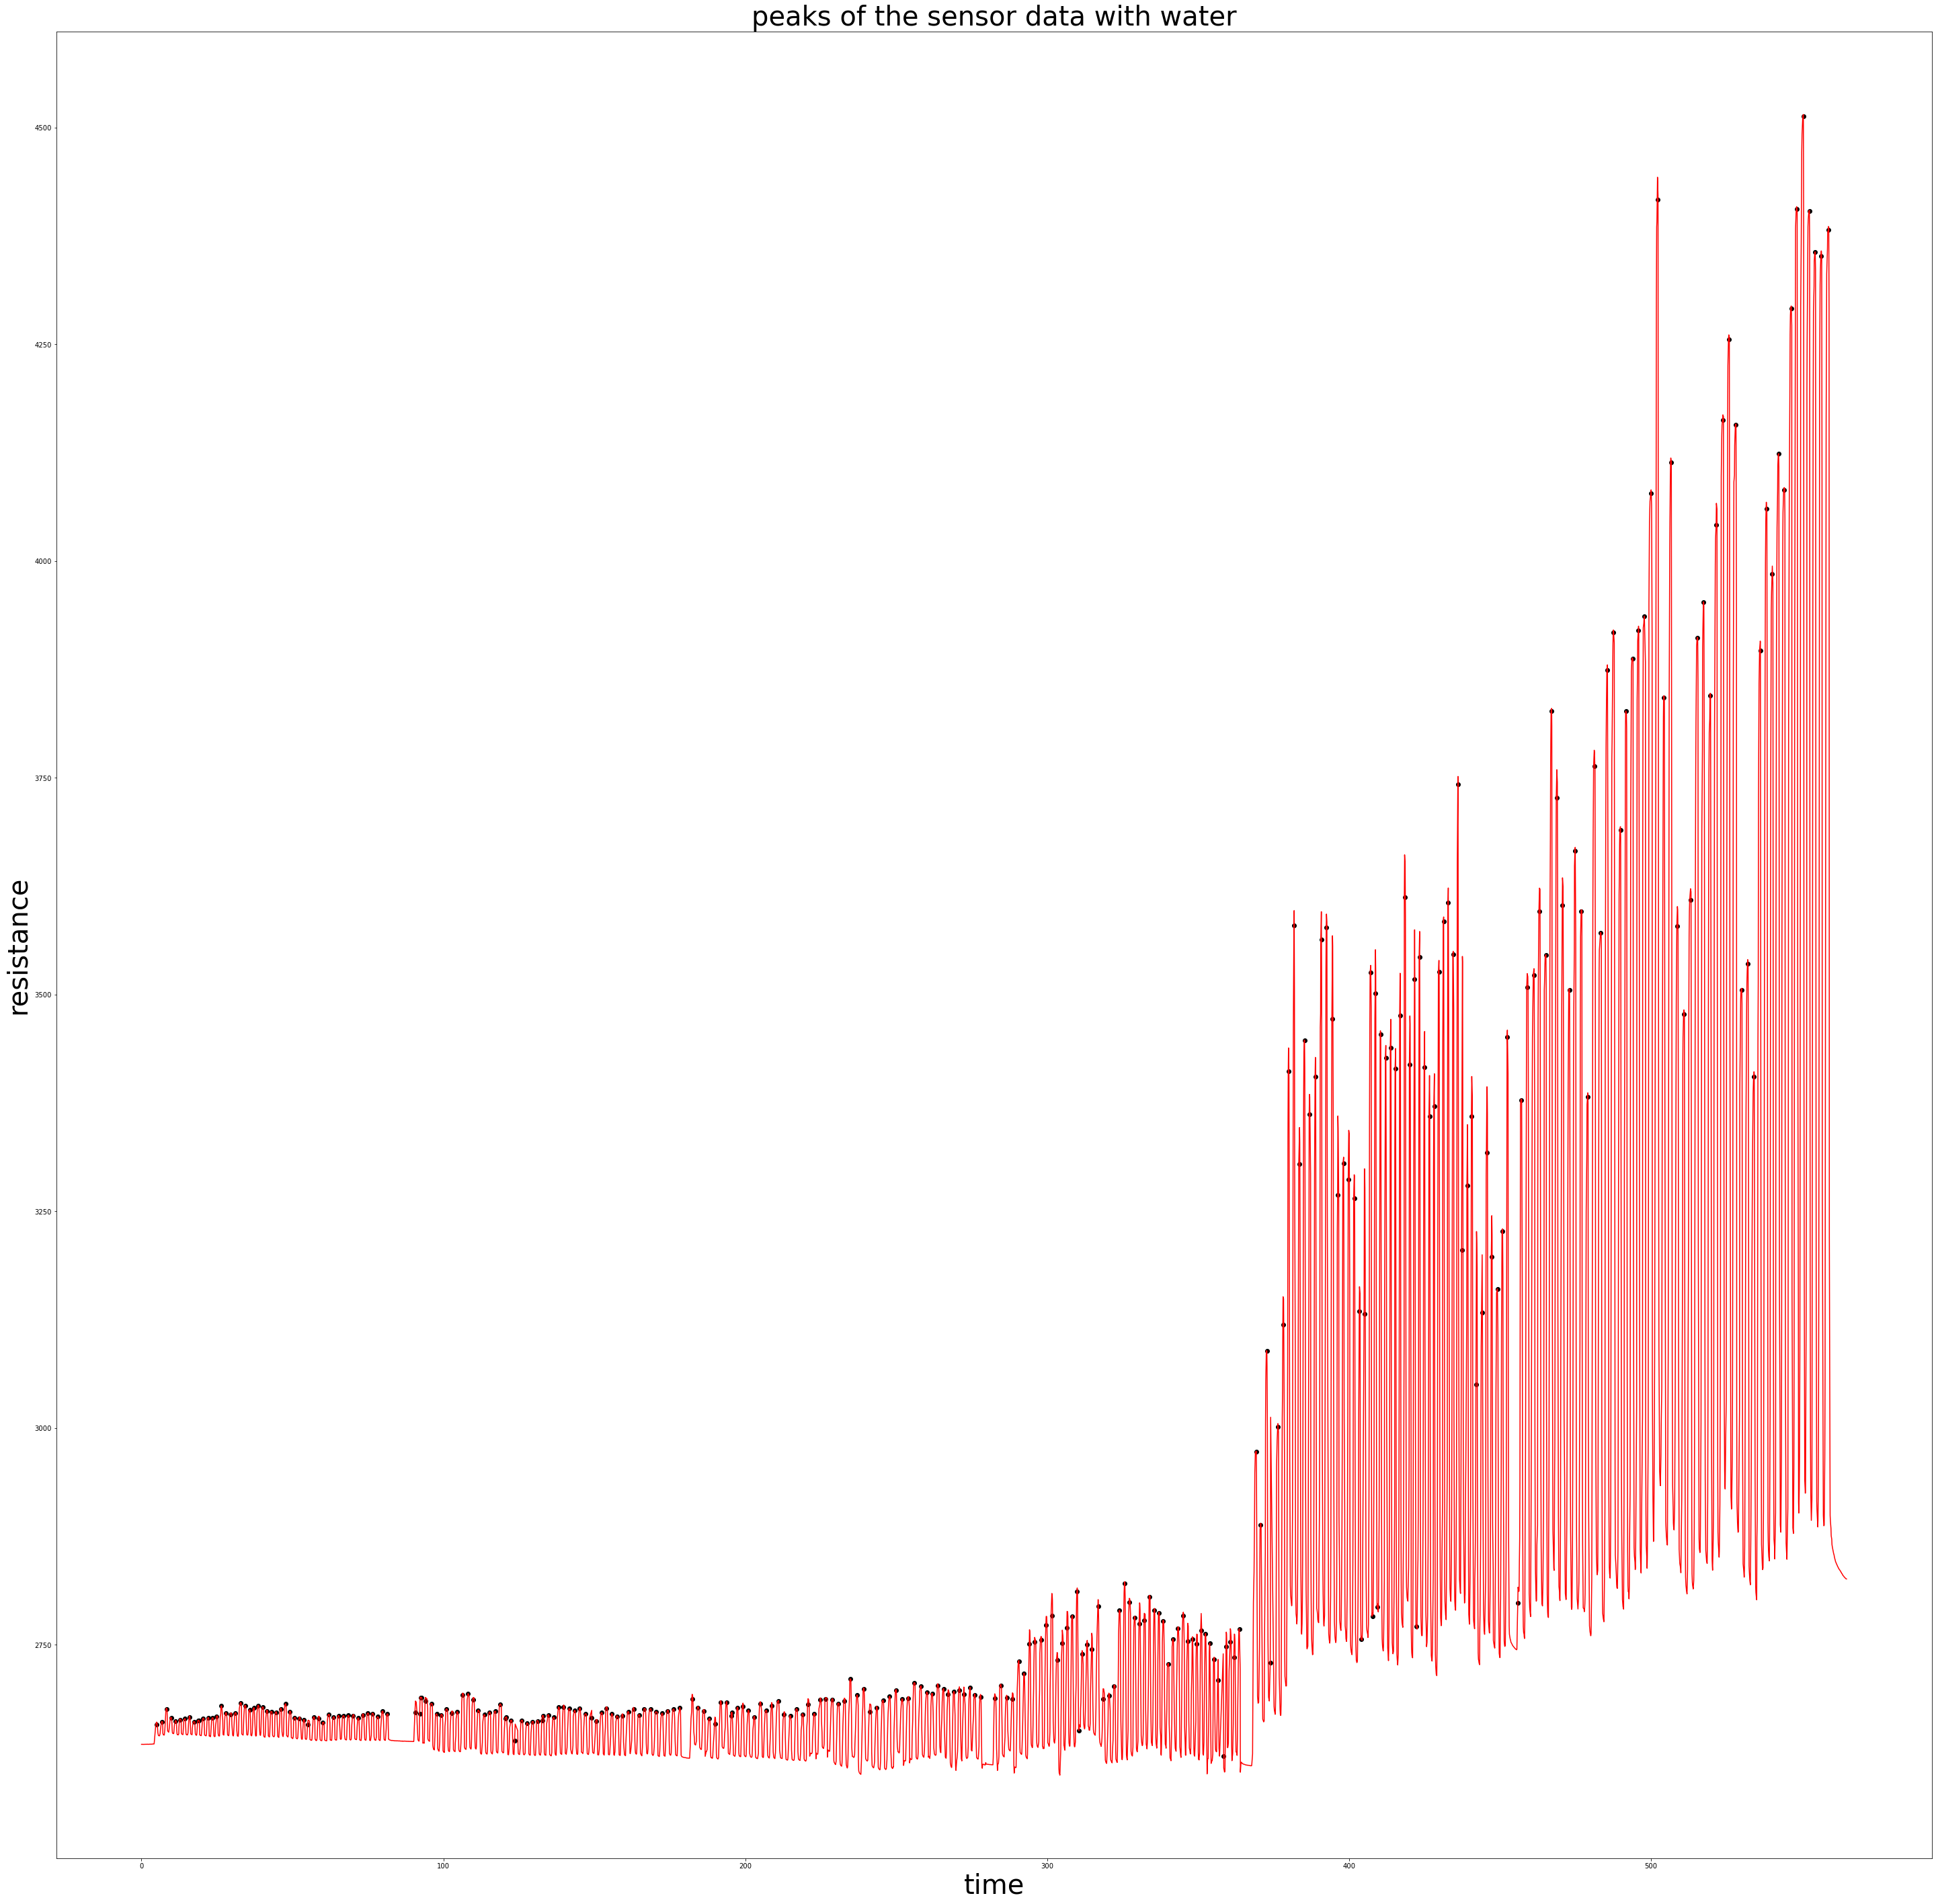

In [7]:
#Finding the peaks for the test with water
# force5_w
# timeforce5_w
# t5w_r3
# time5_w
# peaks_forcedata3_w, _
# peaks_sensordata3_w, _
peaks_sensordata3_w, _ = find_peaks(t5w_r3,height = 2650)
peaks_forcedata3_w, _  = find_peaks(force5_w,height = 1, distance = 1)

plt.figure(figsize=(50, 50))

plt.plot(time5_w,t5w_r3, color = 'red', label = 'sesnor original data with water')
plt.scatter(time5_w[peaks_sensordata3_w],t5w_r3[peaks_sensordata3_w], color = 'black', label = 'sensor 3')
plt.title("peaks of the sensor data with water",fontsize = fontsize)
plt.xlabel("time",fontsize = fontsize)
plt.ylabel("resistance",fontsize = fontsize)

# t5w_r3
# time5_w

Text(0, 0.5, 'load')

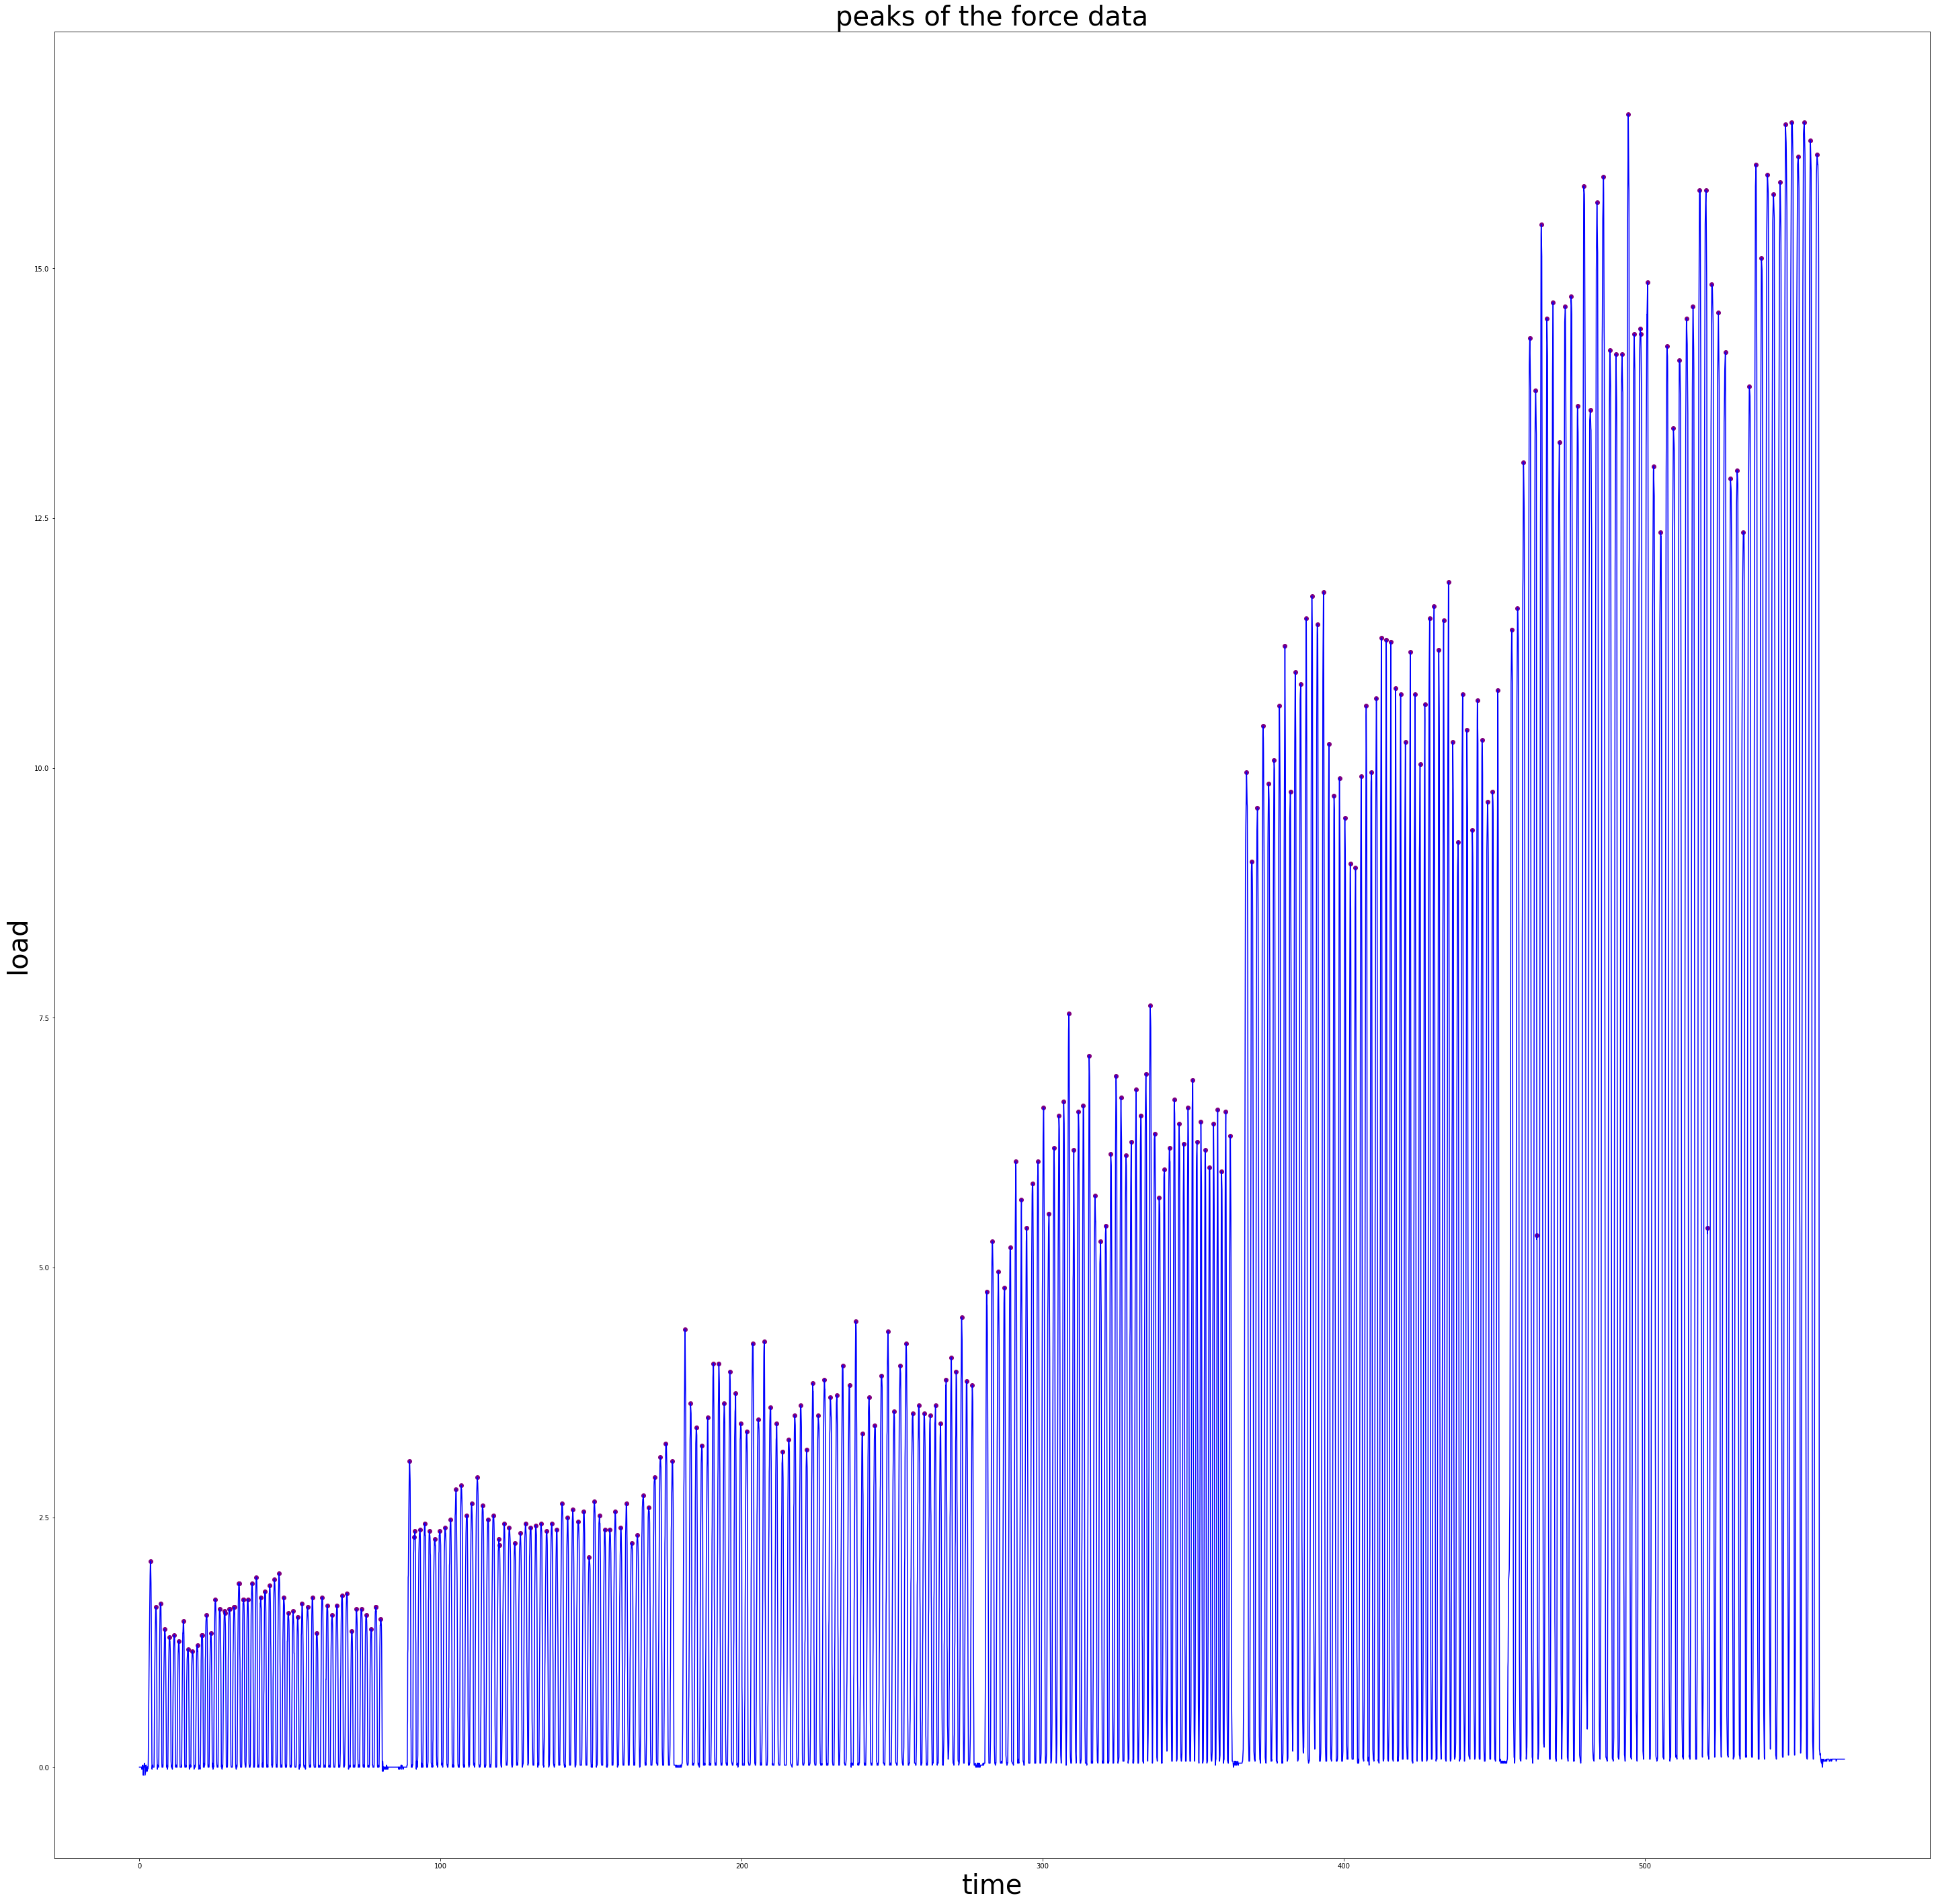

In [8]:
plt.figure(figsize=(50, 50))
plt.plot(timeforce5_w,force5_w, color = 'blue', label = 'force original data for s3 with water')
plt.scatter(timeforce5_w[peaks_forcedata3_w],force5_w[peaks_forcedata3_w], color = 'purple', label = 'foce')


plt.title("peaks of the force data",fontsize = fontsize)
plt.xlabel("time",fontsize = fontsize)
plt.ylabel("load",fontsize = fontsize)

Text(0, 0.5, 'resistance')

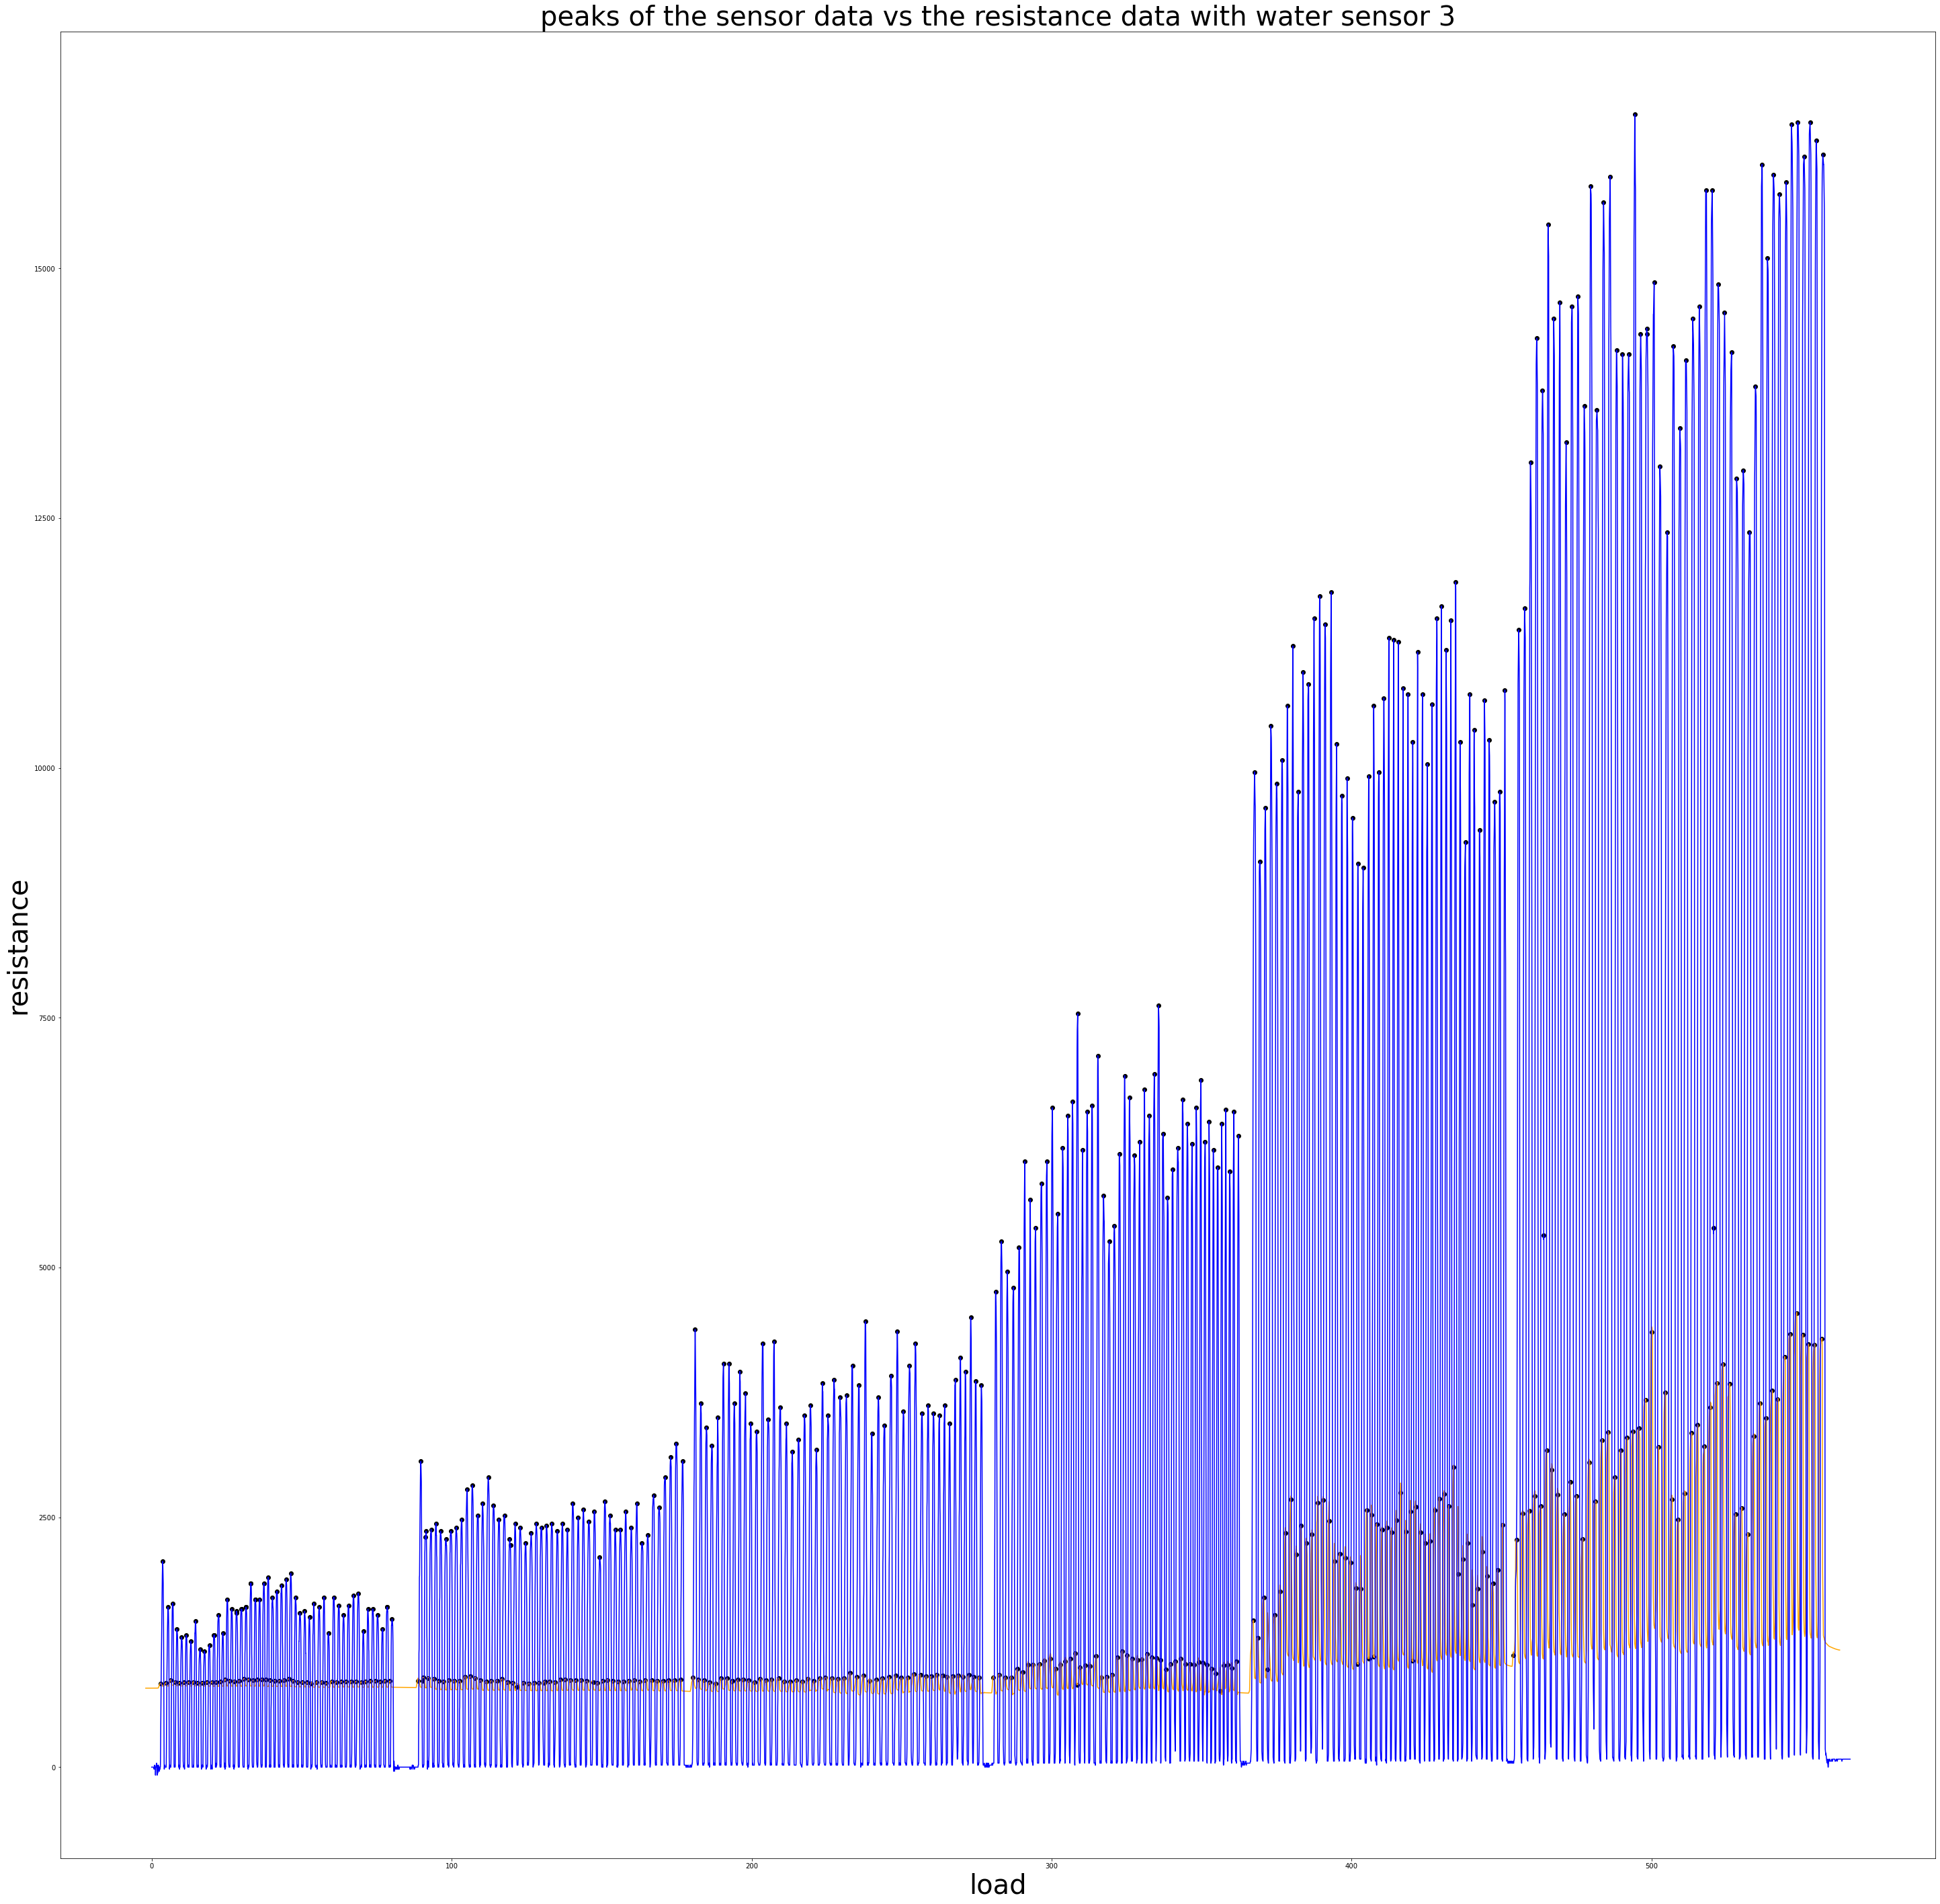

In [10]:
#With water overlay peaks
#plotting the load vs resistance
time5_w_new = time5_w - 2

transformed_sensordata3_w = np.multiply(np.subtract(t5w_r3,2240),2)
transformed_peaks_sensordata3_w = np.multiply(np.subtract(t5w_r3[peaks_sensordata3_w],2240),2)

#aligning the data


transformed_forcedata3_w = np.multiply(force5_w,1000)
transformed_peaks_forcedata3_w = np.multiply(force5_w[peaks_forcedata3_w],1000)

plt.figure(figsize=(50, 50))

#plt.plot(time5_wo,transformed_sensor3data, color = 'green', label = 'sesnor original data')
plt.plot(time5_w_new,transformed_sensordata3_w, color = 'orange', label = 'sesnor original data')
plt.scatter(time5_w_new[peaks_sensordata3_w],transformed_peaks_sensordata3_w, color = 'black', label = 'sensor 3')

plt.plot(timeforce5_w,transformed_forcedata3_w, color = 'blue', label = 'sesnor original data')
plt.scatter(timeforce5_w[peaks_forcedata3_w],transformed_peaks_forcedata3_w, color = 'black', label = 'foce')


plt.title("peaks of the sensor data vs the resistance data with water sensor 3",fontsize = fontsize)
plt.xlabel("load",fontsize = fontsize)
plt.ylabel("resistance",fontsize = fontsize)

# plt.title("peaks of the force data",fontsize = fontsize)
# plt.xlabel("time",fontsize = fontsize)
# plt.ylabel("load",fontsize = fontsize)

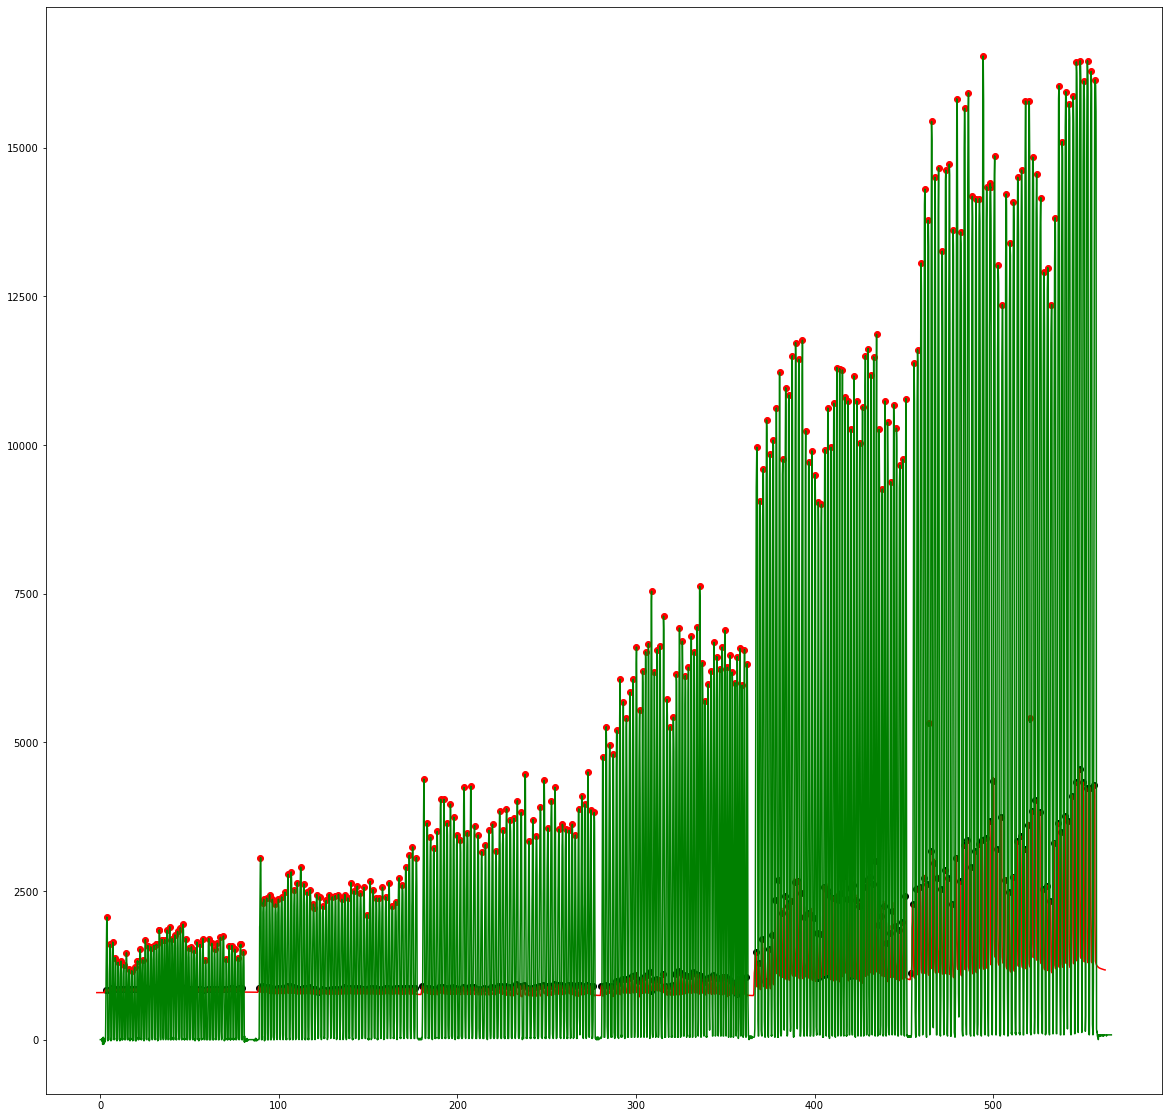

In [11]:
waterslice1_r = transformed_sensordata3_w.iloc[0:4476]
waterslicedpeaks_r = transformed_peaks_sensordata3_w.iloc[0:312]
waterslice1_f = transformed_forcedata3_w.iloc[0:6862]
waterslicedpeaks_f = transformed_peaks_forcedata3_w.iloc[0:312]

plt.figure(figsize=(20, 20))

plt.plot(time5_w_new[0:4476],waterslice1_r, color = 'red', label = 'sesnor original data')
plt.scatter(time5_w_new[peaks_sensordata3_w[0:312]],waterslicedpeaks_r, color = 'black', label = 'sensor 3')

plt.plot(timeforce5_w[0:6862],waterslice1_f, color = 'green', label = 'sesnor original data')
plt.scatter(timeforce5_w[peaks_forcedata3_w[0:312]],waterslicedpeaks_f, color = 'red', label = 'foce')

# force5_w
# timeforce5_w
# t5w_r3
# time5_w
# peaks_forcedata3_w, _
# peaks_sensordata3_w, _
# transformed_sensordata3_w
# transformed_peaks_sensordata3_w
# transformed_forcedata3_w
# transformed_peaks_forcedata3_w

Text(0, 0.5, 'resistance')

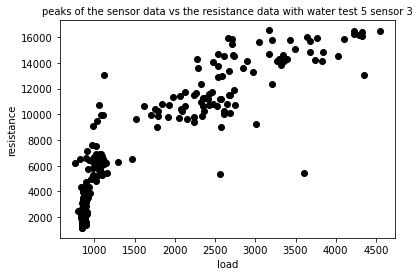

In [12]:
plt.scatter(waterslicedpeaks_r,waterslicedpeaks_f, color = 'black', label = 'peaks')
plt.title("peaks of the sensor data vs the resistance data with water test 5 sensor 3",fontsize = 10)
plt.xlabel("load",fontsize = 10)
plt.ylabel("resistance",fontsize = 10)
